# Breast Cancer Wisconsin (Diagnostic)

# importing libraries


In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np
import plotly.express as px
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


Readind the data


In [19]:
data = pd.read_csv("..\Task 2 Breast Cancer Wisconsin (Diagnostic)\data.csv")

# Data understanding using Exploratory Data Analysis (EDA):

Exploratory Data Analysis (EDA) is the process of exploring and understanding data to uncover patterns, relationships, and insights. It involves visualizing and summarizing data using graphs, charts, and statistical measures to identify trends, outliers, and other patterns in the data

In [20]:
data.shape

(569, 33)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [22]:
data.head(6)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN


Data types visualization and localization of missing data

In [23]:
total = data.isnull().sum().sort_values(ascending=False)
percent_1 = data.isnull().sum()/data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)


,Total,%
Unnamed: 32,569,100.0
compactness_se,0,0.0
fractal_dimension_worst,0,0.0
symmetry_worst,0,0.0
concave points_worst,0,0.0


In [24]:
# Another way to check the null values
data.isnull().sum().sort_values(ascending=False)

Unnamed: 32                569
compactness_se               0
fractal_dimension_worst      0
symmetry_worst               0
concave points_worst         0
concavity_worst              0
compactness_worst            0
smoothness_worst             0
area_worst                   0
perimeter_worst              0
texture_worst                0
radius_worst                 0
fractal_dimension_se         0
symmetry_se                  0
concave points_se            0
concavity_se                 0
id                           0
diagnosis                    0
area_se                      0
perimeter_se                 0
texture_se                   0
radius_se                    0
fractal_dimension_mean       0
symmetry_mean                0
concave points_mean          0
concavity_mean               0
compactness_mean             0
smoothness_mean              0
area_mean                    0
perimeter_mean               0
texture_mean                 0
radius_mean                  0
smoothne

The ‘Unnamed:32’ feature needs further investigation, but it looks like that we might want to drop it from the dataset, since 100% of it are missing.We will drop the column with missing values and also the id

In [25]:
data.drop(columns=["id","Unnamed: 32"],inplace =True )

In [26]:
# checking the shape of the data 
data.shape

(569, 31)

In [28]:
data.columns.to_list()

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [29]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


The dataset has a wide range of features, including mean, worst, and error estimates of different measurements like radius, texture, perimeter, area, smoothness, etc.
For instance, the mean radius varies from 6.981 to 28.11, indicating a wide variety of tumor sizes.
Similarly, variations in texture, perimeter, and area reflect diverse characteristics of the breast cancer samples.
There's a column Unnamed: 32 with all NaN values, which might be redundant and have been removed for analysis

# Data Visualization

In [32]:
# checking the unique values in the target column (diagnosis)
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [30]:
# checking the unique values in the target column (diagnosis)
# print the number of  Malignant and Benign
df_diagnosis=data['diagnosis'].value_counts().reset_index()
df_diagnosis

,diagnosis,count
0,B,357
1,M,212


In [31]:
# show the diferance between the number of  Malignant and Benign     
fig = px.pie(df_diagnosis, values='count', names='diagnosis',title='the number of  Malignant and Benign ')
fig.show()

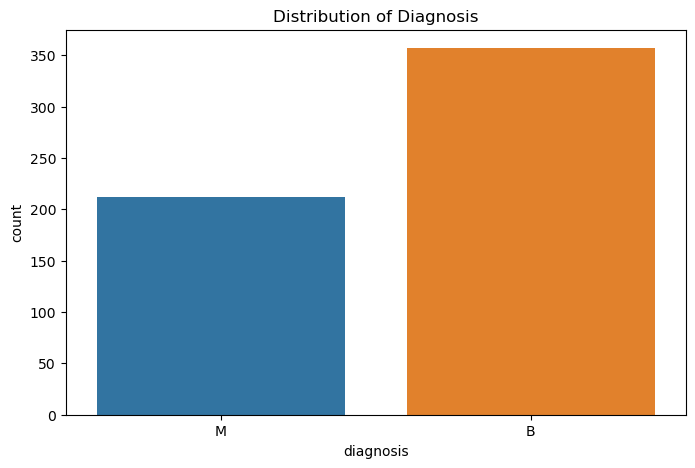

In [33]:
# Plotting a countplot of the diagnosis column assign 
plt.figure(figsize=(8, 5))
sns.countplot(x='diagnosis', data=data)
plt.title('Distribution of Diagnosis')
plt.show()

The above countplot clearly illustrates the distribution of diagnoses in the dataset:

The number of benign (B) cases is significantly higher than the number of malignant (M) cases. This visual representation reaffirms the earlier numerical analysis, where there were 357 benign cases compared to 212 malignant cases.
Such a visualization is helpful in understanding the balance of classes in the dataset, which is an important factor in many analytical and predictive modeling approaches. A balanced dataset often yields better and more generalizable results in predictive modeling

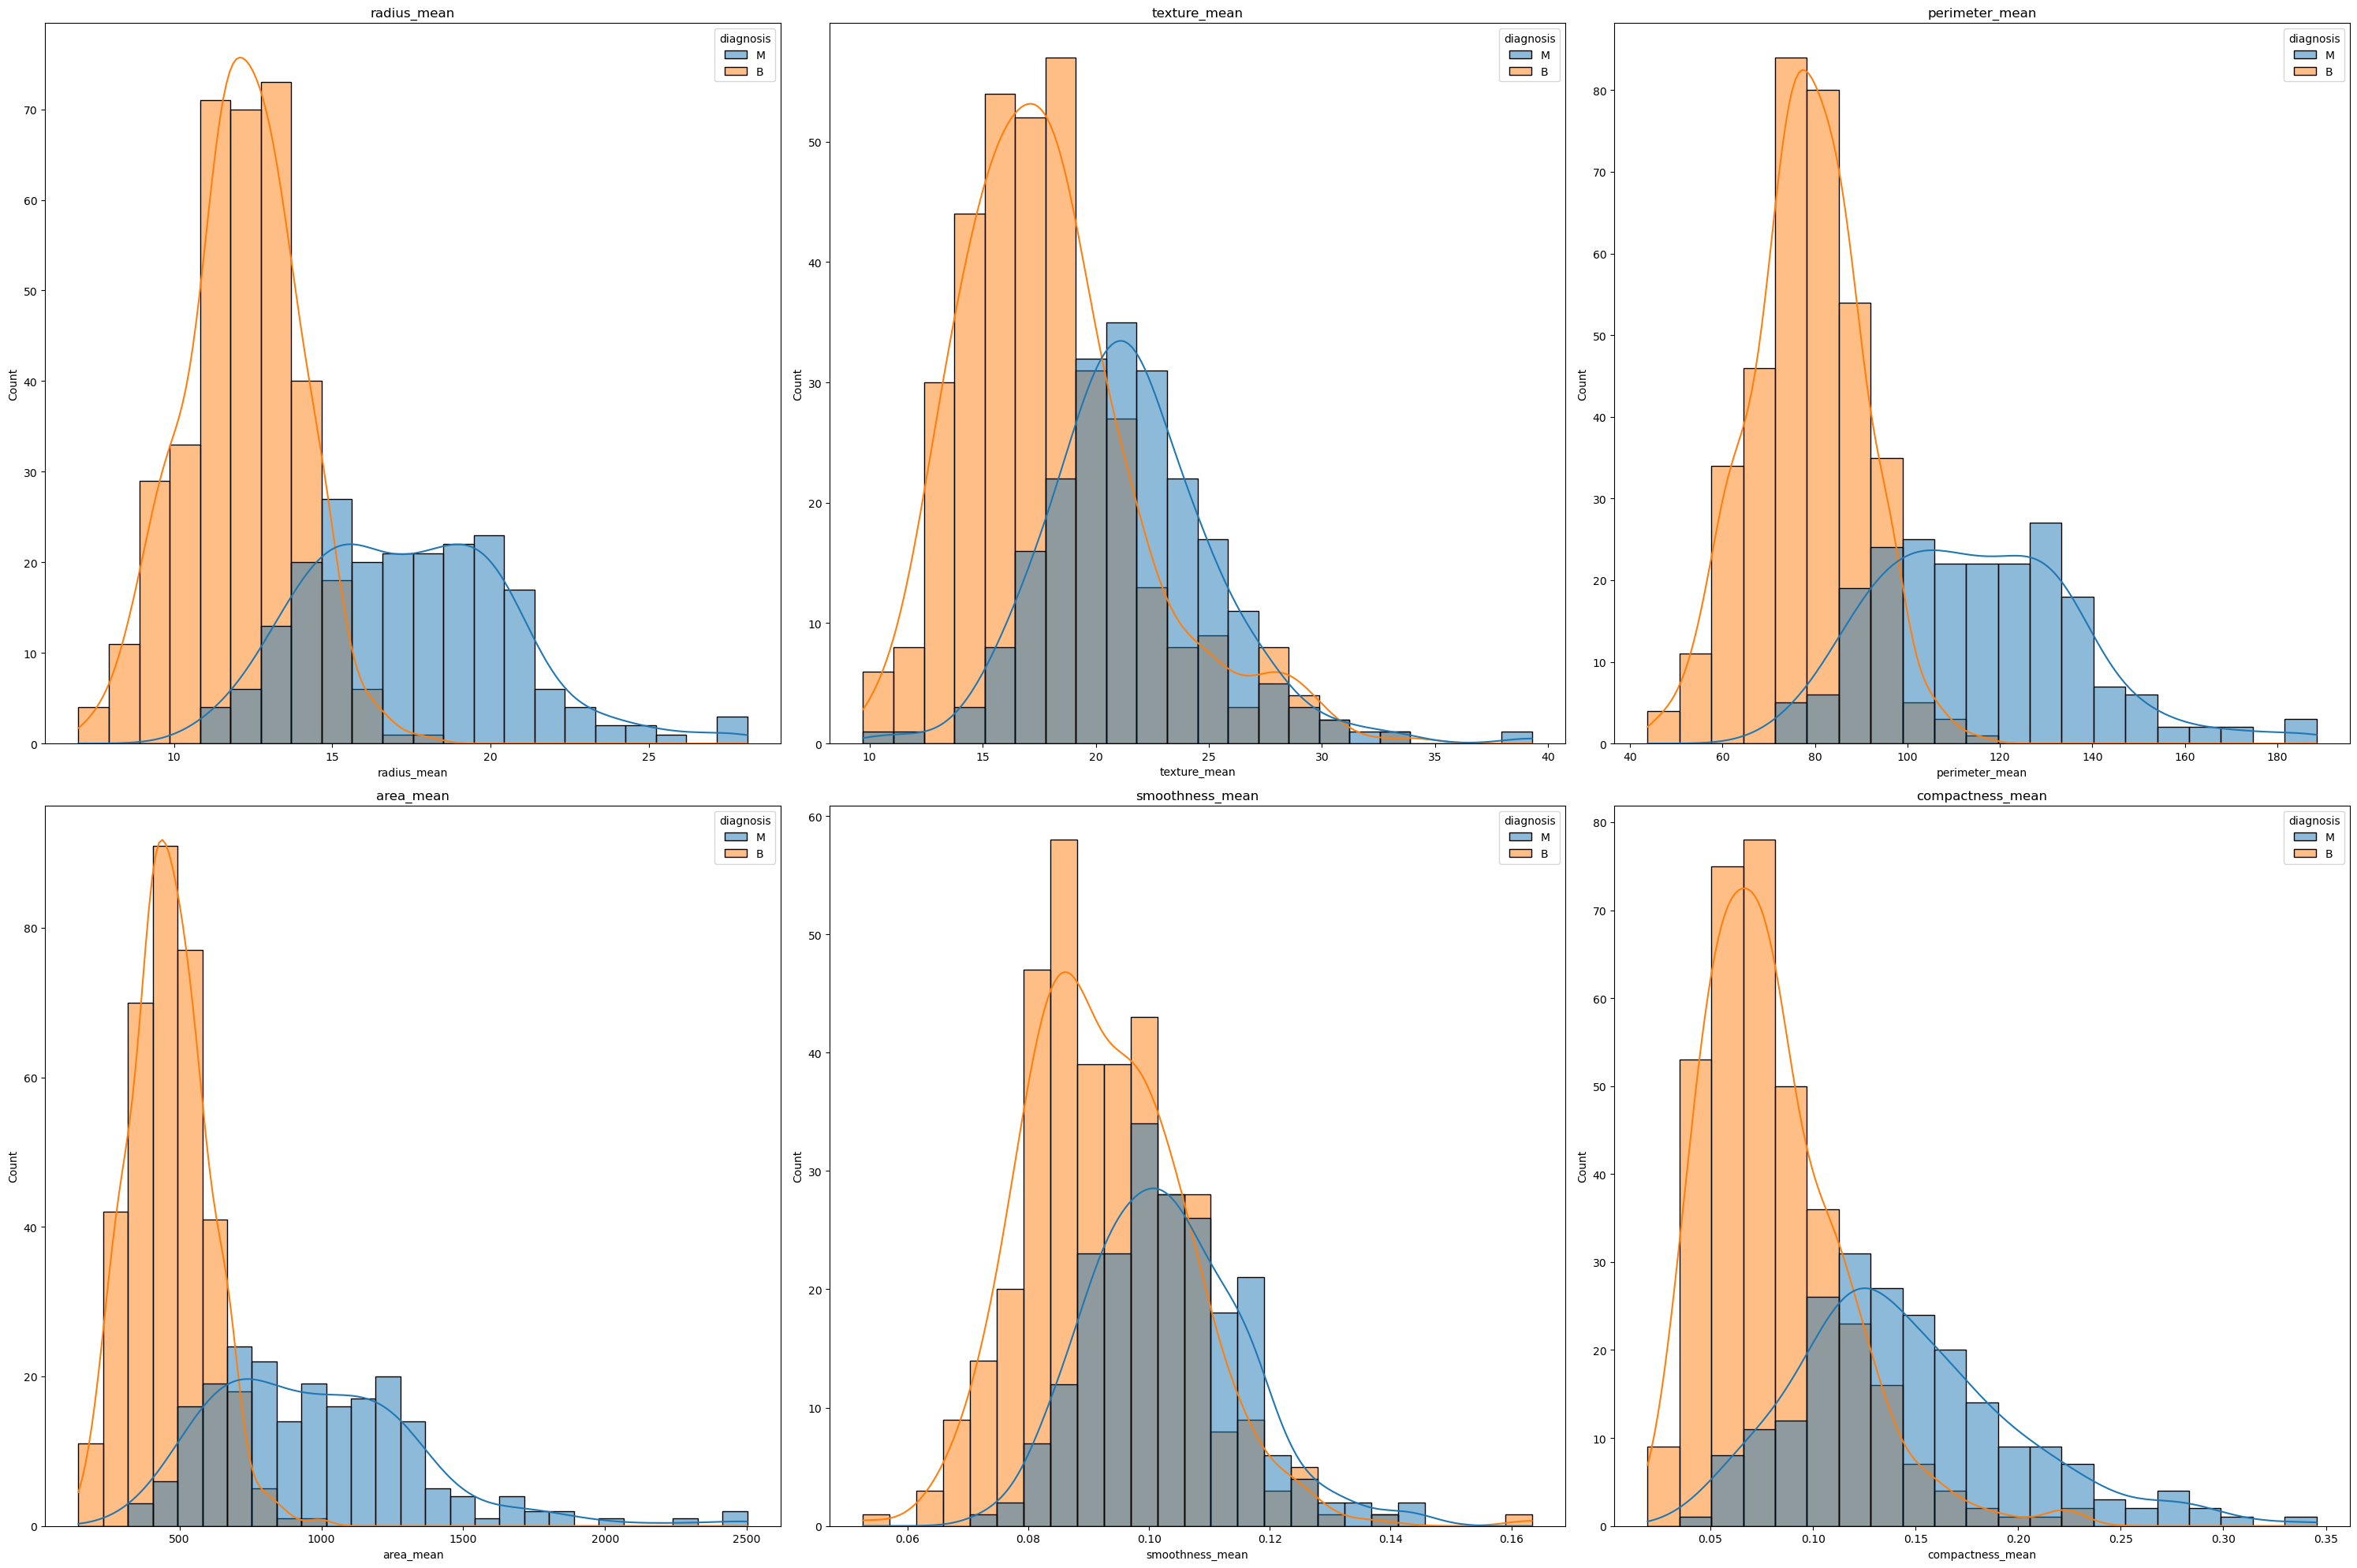

In [35]:

# Setting up the visualization
plt.figure(figsize=(30, 20))

# Selecting a subset of features for visualization
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean','compactness_mean']
n_features = len(features)

# Creating subplots for each feature
for i in range(n_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data, x=features[i], hue='diagnosis', kde=True)
    plt.title(features[i])

plt.tight_layout()
plt.show()

The histograms for each feature provide valuable insights into their distribution and relation to the diagnosis of breast cancer

These visualizations indicate that features related to the size and texture of the tumor (like radius, perimeter, and area) are significant in differentiating between malignant and benign tumors. The smoothness mean, while still relevant, shows a less distinct separation between the two diagnoses. This kind of analysis is crucial for understanding which features are most important in predicting the type of breast cancer and can guide further statistical analysis and model development.

# Scaling the dataset and feature scaling

In [36]:
X=data.drop("diagnosis",axis=1)
y=data['diagnosis']

In [37]:
# scal the featuers max value = 1 , min value = 0 
scaler = MinMaxScaler() 
X = scaler.fit_transform(X)

In [43]:
# convert the target from categorical to numerical 
encoder = LabelEncoder()
y = encoder.fit_transform(y)
#data['diagnosis'] = encoder.fit_transform(data['diagnosis'])

In [44]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Splitting the data into 80% of Training and 20% of testing

In [45]:
# split the data to 80% train & 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=42)

# Models

I used Logistic regression, Decision Treeand random forest machine learning algorithms and below is the function implementing the 3 models

In [54]:
def models(X_train, y_train):
    # Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train, y_train)

    # Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
    tree.fit(X_train, y_train)

    # Random Forest Classifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
    forest.fit(X_train, y_train)

 
    # print the model accuracy on the training data
    print('[0]Logistic Regression Training Accuracy:', log.score(X_train, y_train))
    print('[1]Decision Tree Classifier Training Accuracy:', tree.score(X_train, y_train))
    print('[2]Random Forest Classifier Training Accuracy:', forest.score(X_train, y_train))

    return log, tree, forest

In [55]:
model= models(X_train, y_train)

[0]Logistic Regression Training Accuracy: 0.967032967032967
[1]Decision Tree Classifier Training Accuracy: 1.0
[2]Random Forest Classifier Training Accuracy: 1.0


# Evaluate the Performance of the Model

In [68]:
# evaluate the model on classification report and accuracy score
from sklearn.metrics import classification_report, accuracy_score

# Initialize an empty DataFrame
model_performance = pd.DataFrame(columns=['Model', 'Precision', 'Recall', 'F1-Score', 'Accuracy'])

# List of model names for reference
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']

for i, m in enumerate(model):
    # Predict using the model
    predictions = m.predict(X_test)

    # Get the classification report
    cr = classification_report(y_test, predictions, output_dict=True)

    # Extract performance metrics
    precision = cr['weighted avg']['precision']
    recall = cr['weighted avg']['recall']
    f1_score = cr['weighted avg']['f1-score']
    accuracy = accuracy_score(y_test, predictions)

    # Create a new DataFrame for the current model's performance
    current_model_performance = pd.DataFrame({'Model': [model_names[i]],
                                              'Precision': [precision],
                                              'Recall': [recall],
                                              'F1-Score': [f1_score],
                                              'Accuracy': [accuracy]})

    # Concatenate with the main DataFrame
    model_performance = pd.concat([model_performance, current_model_performance], ignore_index=True)

# Print the DataFrame
print(model_performance)

                 Model  Precision    Recall  F1-Score  Accuracy
0  Logistic Regression   0.982937  0.982456  0.982369  0.982456
1        Decision Tree   0.956905  0.956140  0.955801  0.956140
2        Random Forest   0.974751  0.973684  0.973481  0.973684


The table presents the performance metrics of four different classification models on a test dataset. These metrics include Precision, Recall, F1-Score, and Accuracy.

Logistic Regression:
Precision: 98.29%
Recall: 98.25%
F1-Score: 98.24%
Accuracy: 98.25%
Logistic Regression performs exceptionally well with very high precision, recall, F1-score, and accuracy, indicating a strong ability to correctly classify and balance between positive and negative classes.

In summary, all models perform well, with Logistic Regression showing the best overall metrics. The choice between these models should consider not just these metrics but also the specific context of the problem, such as the cost of false positives vs. false negatives, the complexity of the model, and the computational resources available.

# Model of choice (Logistic Regression)

# Cross_Validation

In [74]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
scores = cross_val_score(reg, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.97826087 0.95652174 0.97826087 0.93478261 0.97826087 1.
 0.93333333 0.97777778 0.97777778 0.91111111]
Mean: 0.9626086956521739
Standard Deviation: 0.026293865440409507


This looks much more realistic than before. Our model has a average accuracy of 96% with a standard deviation of 2 %. The standard deviation shows us, how precise the estimates are .
This means in our case that the accuracy of our model can differ + — 2%.

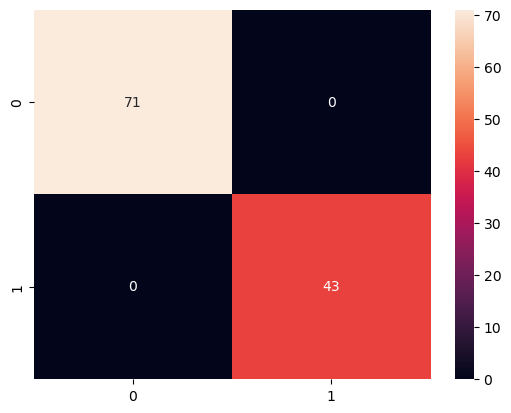

In [61]:
# show the confusion matrix
cm = confusion_matrix(y_test, y_test)
sns.heatmap(cm, annot=True)
plt.show()

# Predictions

In [79]:
# predictions
pred = model[0].predict(X_test)
print('Our model predictions: ')
print(pred)
print()
print('Actual values: ')
print(y_test)

Our model predictions: 
[0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1]

Actual values: 
[0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1]


# report

In [80]:
name=['Benign','Malignant']
classification_rep = classification_report(y_test, y_test, target_names=name)
print("\nClassification Report:")
print(classification_rep)


Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00        71
   Malignant       1.00      1.00      1.00        43

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114

